In [13]:
# Import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import seaborn as sns

#### Lyrics cleaned with english stop words

In [14]:
########## ANN LYRICS ENGLISH STOP WORDS ##########
# Import data and split into training and testing
lyrics1 = pd.read_csv("paul_john_lyrics_corpus_count100.csv") # (141, 101)

train_lyrics1, test_lyrics1 = train_test_split(lyrics1, test_size = 0.3, random_state = 42)

x_train_lyrics1 = train_lyrics1.loc[:, lyrics1.columns != "LABEL"].to_numpy() # (98, 100)
x_test_lyrics1 = test_lyrics1.loc[:, lyrics1.columns != "LABEL"].to_numpy() # (43, 300)
y_train_lyrics1 = train_lyrics1.loc[:, lyrics1.columns == "LABEL"].to_numpy() # (98, 1)
y_test_lyrics1 = test_lyrics1.loc[:, lyrics1.columns == "LABEL"].to_numpy() # (43, 1)

In [15]:
# What does the data look like?
print("The first value of x_train_lyrics1 is: \n", x_train_lyrics1[0])
print("The shape of x_train is: ", x_train_lyrics1.shape, "\n")

print("The first value of y_train_lyrics1 is: ", y_train_lyrics1[0])
print("The shape of y_train is: ", y_train_lyrics1.shape, "\n")

print("The first value of x_test_lyrics1 is: \n", x_test_lyrics1[0])
print("The shape of x_test is: ", x_test_lyrics1.shape, "\n")

print("The first value of y_test_lyrics1 is: ", y_test_lyrics1[0])
print("The shape of y_test is: ", y_test_lyrics1.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics1 = encoder.fit_transform(y_train_lyrics1)
y_test_one_hot_lyrics1 = encoder.transform(y_test_lyrics1)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics1, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics1, dtype=np.float32) 
x_test = np.array(x_test_lyrics1, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics1, dtype=np.float32)

# after one-hot-encode
print("The first value of x_train_lyrics1 is: \n", x_train[0])
print("The shape of x_train_lyrics1 is: ", x_train.shape, "\n")

print("The first value of y_train_lyrics1 is: ", y_train[0])
print("The shape of y_train_lyrics1 is: ", y_train.shape, "\n")

print("The first value of x_test_lyrics1 is: \n", x_test[0])
print("The shape of x_test_lyrics1 is: ", x_test.shape, "\n")

print("The first value of y_test_lyrics1 is: ", y_test[0])
print("The shape of y_test_lyrics1 is: ", y_test.shape, "\n")

The first value of x_train_lyrics1 is: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 5 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The shape of x_train is:  (98, 100) 

The first value of y_train_lyrics1 is:  ['Lennon']
The shape of y_train is:  (98, 1) 

The first value of x_test_lyrics1 is: 
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  2  0  0  0  0  3  0  0  0  0  0  0  0  0  0
 48  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0
  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  0]
The shape of x_test is:  (43, 100) 

The first value of y_test_lyrics1 is:  ['Lennon']
The shape of y_test is:  (43, 1) 

The first value of x_train_lyrics1 is: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4854 - loss: 1.8402 - val_accuracy: 0.5349 - val_loss: 0.9055
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4910 - loss: 1.5824 - val_accuracy: 0.5349 - val_loss: 0.8774
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5620 - loss: 1.3039 - val_accuracy: 0.5116 - val_loss: 0.8531
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4315 - loss: 1.3415 - val_accuracy: 0.5349 - val_loss: 0.8320
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4195 - loss: 1.4053 - val_accuracy: 0.5581 - val_loss: 0.8189
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5247 - loss: 1.1732 - val_accuracy: 0.5116 - val_loss: 0.8136
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4712 - loss: 1.1161 - val_accuracy: 0.5116 - val_loss: 0.8113
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4835 - loss: 1.0032 - val_accuracy: 0.5581 - val_loss: 0.8113


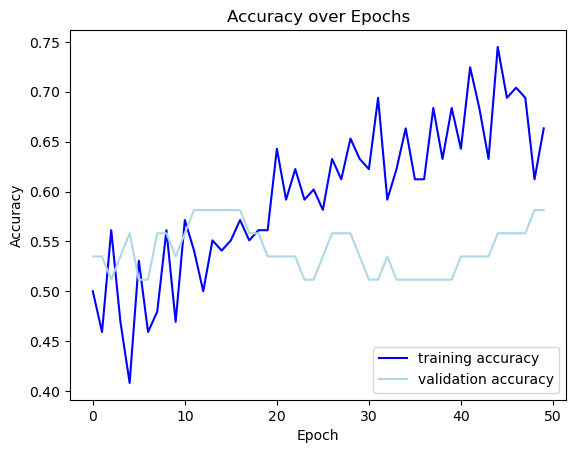

In [16]:
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

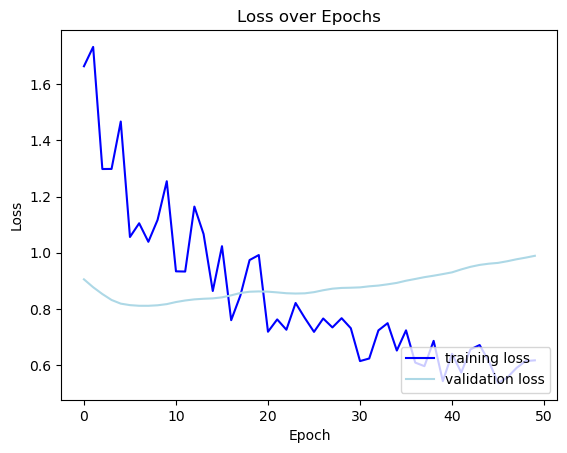

In [17]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

ANN.evaluate() accuracy: 0.5814 ANN.evaluate() loss:0.9893
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


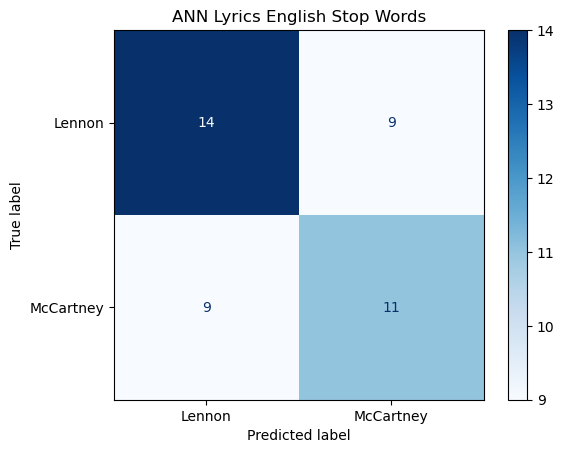

In [21]:
# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test, verbose = 0)
print(f"ANN.evaluate() accuracy: {Test_Accuracy:.4f} ANN.evaluate() loss:{Test_Loss:.4f}")

# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.argmax(predictions, axis = 1) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = encoder.categories_[0]
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics English Stop Words")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.6087    0.6087    0.6087        23
   McCartney     0.5500    0.5500    0.5500        20

    accuracy                         0.5814        43
   macro avg     0.5793    0.5793    0.5793        43
weighted avg     0.5814    0.5814    0.5814        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.4938 - loss: 0.7559 - val_accuracy: 0.3488 - val_loss: 0.7587
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5581 - loss: 0.7050 - val_accuracy: 0.3721 - val_loss: 0.7527
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5425 - loss: 0.7238 - val_accuracy: 0.3953 - val_loss: 0.7431
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4938 - loss: 0.7364 - val_accuracy: 0.4419 - val_loss: 0.7347
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5267 - loss: 0.7055 - val_accuracy: 0.4651 - val_loss: 0.7153
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5382 - loss: 0.7011 - val_accuracy: 0.4651 - val_loss: 0.7008
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4926 - loss: 0.7466 - val_accuracy: 0.5116 - val_loss: 0.6938
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6500 - loss: 0.6728 - val_accuracy: 0.5116 - val_loss: 0.6918

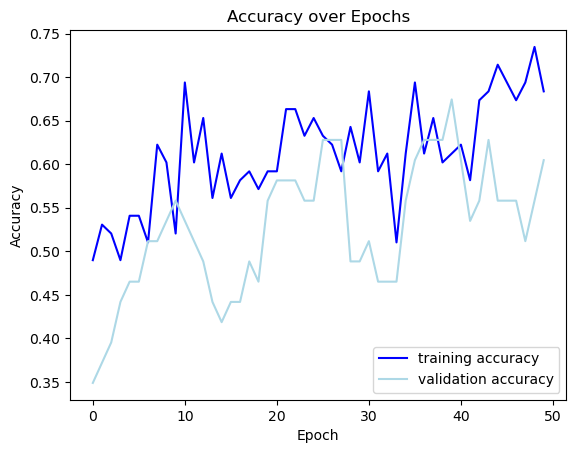

In [24]:
########## RNN LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

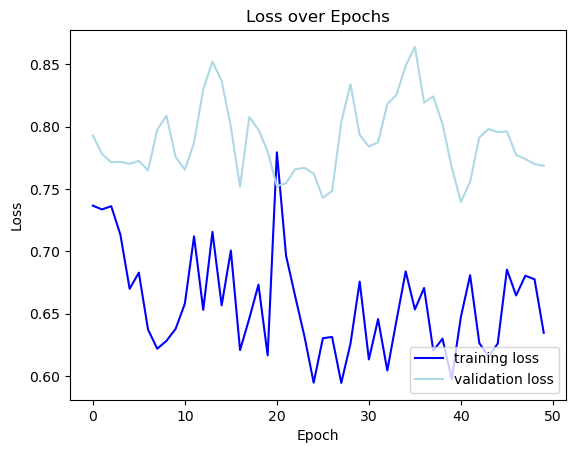

In [130]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

RNN.evaluate() accuracy: 0.6047 ANN.evaluate() loss:0.6962
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


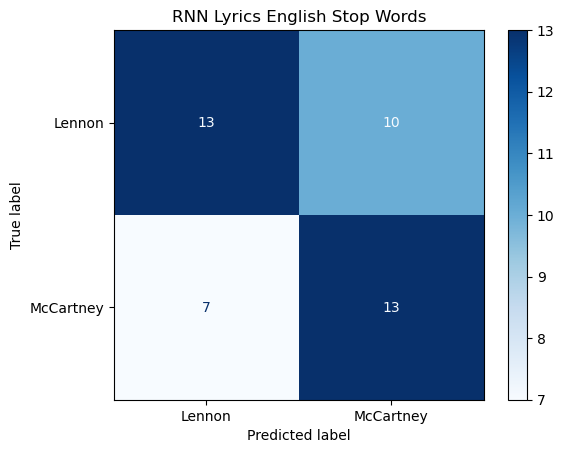

In [26]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test, verbose = 0)
print(f"RNN.evaluate() accuracy: {Test_Accuracy:.4f} ANN.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics English Stop Words")
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.6500    0.5652    0.6047        23
   McCartney     0.5652    0.6500    0.6047        20

    accuracy                         0.6047        43
   macro avg     0.6076    0.6076    0.6047        43
weighted avg     0.6106    0.6047    0.6047        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.4289 - loss: 0.7009 - val_accuracy: 0.4884 - val_loss: 0.6891
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5133 - loss: 0.6946 - val_accuracy: 0.4651 - val_loss: 0.6895
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5155 - loss: 0.6877 - val_accuracy: 0.4651 - val_loss: 0.6926
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4879 - loss: 0.6946 - val_accuracy: 0.4651 - val_loss: 0.6959
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5506 - loss: 0.6997 - val_accuracy: 0.4651 - val_loss: 0.7000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.5559 - loss: 0.6931 - val_accuracy: 0.4651 - val_loss: 0.7036
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5310 - loss: 0.6861 - val_accuracy: 0.4651 - val_loss: 0.7061
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5332 - loss: 0.7096 - val_accuracy: 0.4651 - val_loss: 0.7

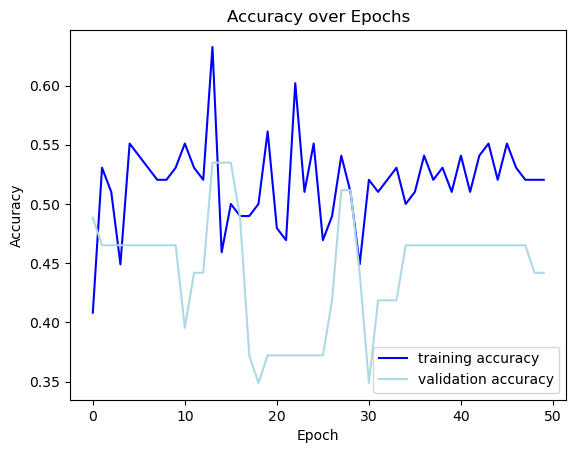

In [28]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

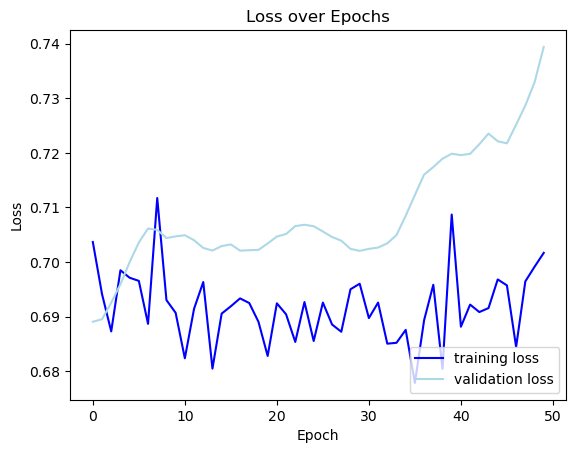

In [31]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

ANN.evaluate() accuracy: 0.4419 ANN.evaluate() loss:0.7394
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


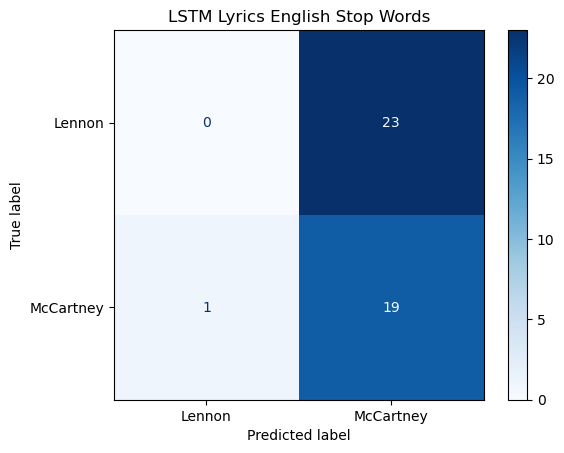

In [32]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test, verbose = 0)
print(f"ANN.evaluate() accuracy: {Test_Accuracy:.4f} ANN.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics English Stop Words")
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.0000    0.0000    0.0000        23
   McCartney     0.4524    0.9500    0.6129        20

    accuracy                         0.4419        43
   macro avg     0.2262    0.4750    0.3065        43
weighted avg     0.2104    0.4419    0.2851        43



#### Lyrics cleaned with lemmer

In [35]:
# Import data and split into training and testing
lyrics2 = pd.read_csv("paul_john_lyrics_corpus_lem_count100.csv") # (141, 101)

train_lyrics2, test_lyrics2 = train_test_split(lyrics2, test_size = 0.3, random_state = 42)

x_train_lyrics2 = train_lyrics2.loc[:, lyrics2.columns != "Label"].to_numpy() # (98, 100)
x_test_lyrics2 = test_lyrics2.loc[:, lyrics2.columns != "Label"].to_numpy() # (43, 300)
y_train_lyrics2 = train_lyrics2.loc[:, lyrics2.columns == "Label"].to_numpy() # (98, 1)
y_test_lyrics2 = test_lyrics2.loc[:, lyrics2.columns == "Label"].to_numpy() # (43, 1)

In [36]:
# What does the data look like?
print("The first value of x_train_lyrics2 is: \n", x_train_lyrics2[0])
print("The shape of x_train_lyrics2 is: ", x_train_lyrics2.shape, "\n")

print("The first value of y_train_lyrics2 is: ", y_train_lyrics2[0])
print("The shape of y_train_lyrics2 is: ", y_train_lyrics2.shape, "\n")

print("The first value of x_test_lyrics2 is: \n", x_test_lyrics2[0])
print("The shape of x_test_lyrics2 is: ", x_test_lyrics2.shape, "\n")

print("The first value of y_test_lyrics2 is: ", y_test_lyrics2[0])
print("The shape of y_test_lyrics2 is: ", y_test_lyrics2.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics2 = encoder.fit_transform(y_train_lyrics2)
y_test_one_hot_lyrics2 = encoder.transform(y_test_lyrics2)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics2, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics2, dtype=np.float32) 
x_test = np.array(x_test_lyrics2, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics2, dtype=np.float32)

# after one-hot-encode
print("The first value of x_train_lyrics1 is: \n", x_train[0])
print("The shape of x_train is: ", x_train.shape, "\n")

print("The first value of y_train_lyrics1 is: ", y_train[0])
print("The shape of y_train is: ", y_train.shape, "\n")

print("The first value of x_test_lyrics1 is: \n", x_test[0])
print("The shape of x_test is: ", x_test.shape, "\n")

print("The first value of y_test_lyrics1 is: ", y_test[0])
print("The shape of y_test is: ", y_test.shape, "\n")

The first value of x_train_lyrics2 is: 
 [5 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 9 0 1 2
 1 1 0 0 0 0 0 0 5 0 0 0 5 1 2 0 0 0 0 0 0 0 7 0 0 0 1 0 0 0 0 0 2 0 0 5 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0]
The shape of x_train_lyrics2 is:  (98, 100) 

The first value of y_train_lyrics2 is:  ['Lennon']
The shape of y_train_lyrics2 is:  (98, 1) 

The first value of x_test_lyrics2 is: 
 [ 0  0  3  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  1  0
  2  0  0  0  0  0  0  0  0  0  0  0  0  3  0 48  3  0  0  0  0  0  0  0
  0  1  0 33  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  7  0  0  0  0
  0  0  0  0  3  9  0  0  0  0  1 10  0  0  0  0  0  0  1  0  0  0  0  1
  1  0 53  0]
The shape of x_test_lyrics2 is:  (43, 100) 

The first value of y_test_lyrics2 is:  ['Lennon']
The shape of y_test_lyrics2 is:  (43, 1) 

The first value of x_train_lyrics1 is: 
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5775 - loss: 1.6384 - val_accuracy: 0.5116 - val_loss: 1.0490
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5280 - loss: 1.9525 - val_accuracy: 0.5581 - val_loss: 1.0441
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4496 - loss: 1.8308 - val_accuracy: 0.5349 - val_loss: 1.0515
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4852 - loss: 2.2862 - val_accuracy: 0.5116 - val_loss: 1.0614
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4670 - loss: 1.7797 - val_accuracy: 0.5116 - val_loss: 1.0637
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5302 - loss: 1.5142 - val_accuracy: 0.4884 - val_loss: 1.0444
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5550 - loss: 1.4314 - val_accuracy: 0.5349 - val_loss: 1.0129
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4577 - loss: 1.6698 - val_accuracy: 0.5349 - val_loss: 0.9667

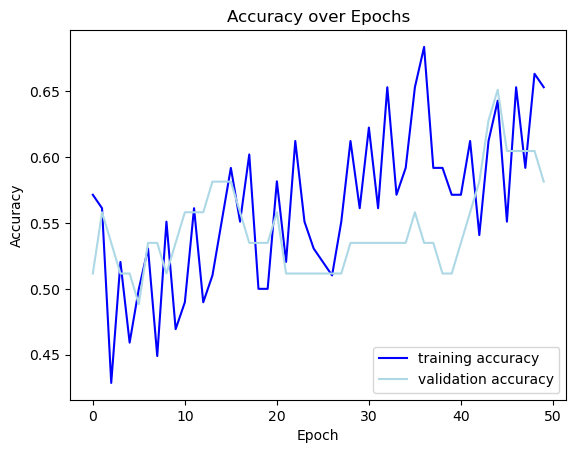

In [37]:
########## ANN LYRICS LEMMER ##########
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

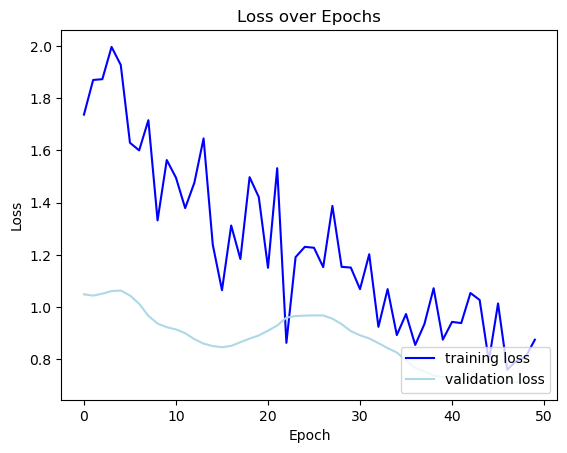

In [43]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

ANN.evaluate() accuracy: 0.5814 ANN.evaluate() loss:0.7096
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


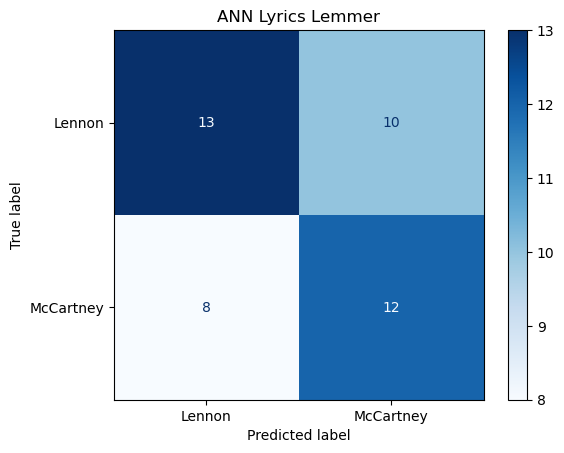

In [41]:
# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test, verbose = 0)
print(f"ANN.evaluate() accuracy: {Test_Accuracy:.4f} ANN.evaluate() loss:{Test_Loss:.4f}")

# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics Lemmer")
plt.show()

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.6190    0.5652    0.5909        23
   McCartney     0.5455    0.6000    0.5714        20

    accuracy                         0.5814        43
   macro avg     0.5823    0.5826    0.5812        43
weighted avg     0.5848    0.5814    0.5818        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.4844 - loss: 0.7932 - val_accuracy: 0.5116 - val_loss: 0.7127
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4934 - loss: 0.7467 - val_accuracy: 0.5581 - val_loss: 0.7072
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5570 - loss: 0.7012 - val_accuracy: 0.5349 - val_loss: 0.7105
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5589 - loss: 0.7083 - val_accuracy: 0.5116 - val_loss: 0.7172
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4855 - loss: 0.7522 - val_accuracy: 0.5116 - val_loss: 0.7224
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5405 - loss: 0.7284 - val_accuracy: 0.4884 - val_loss: 0.7257
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5412 - loss: 0.7173 - val_accuracy: 0.4884 - val_loss: 0.7238
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5620 - loss: 0.7191 - val_accuracy: 0.4884 - val_loss: 0.7168

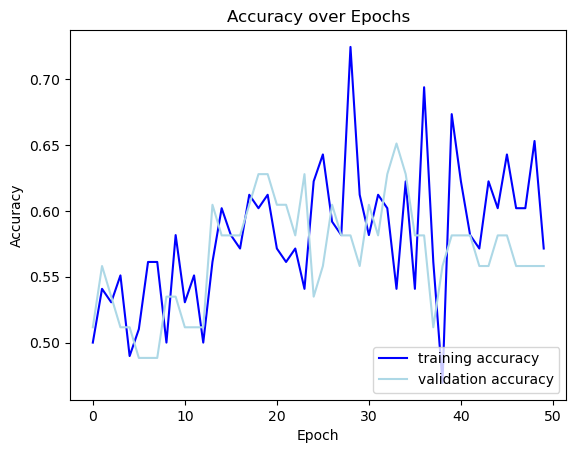

In [44]:
########## RNN LYRICS LEMMER ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

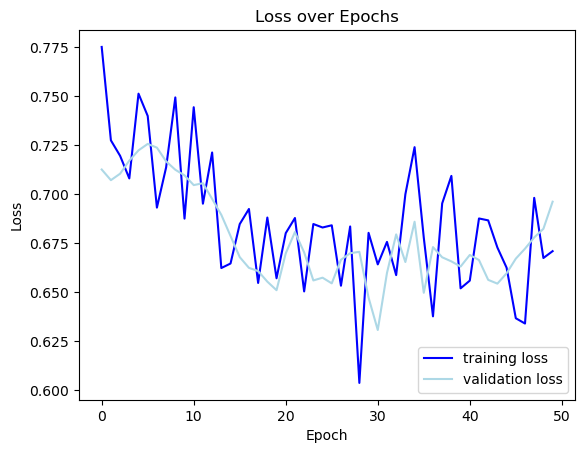

In [45]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

RNN.evaluate() accuracy: 0.5581 RNN.evaluate() loss:0.6962
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


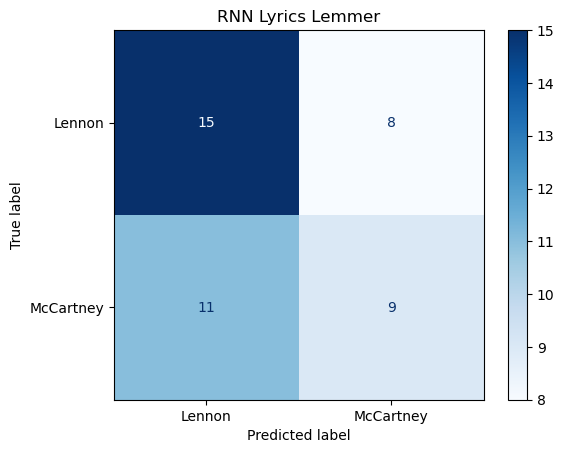

In [46]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test, verbose = 0)
print(f"RNN.evaluate() accuracy: {Test_Accuracy:.4f} RNN.evaluate() loss:{Test_Loss:.4f}")

# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics Lemmer")
plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.5769    0.6522    0.6122        23
   McCartney     0.5294    0.4500    0.4865        20

    accuracy                         0.5581        43
   macro avg     0.5532    0.5511    0.5494        43
weighted avg     0.5548    0.5581    0.5538        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 346ms/step - accuracy: 0.5590 - loss: 0.7324 - val_accuracy: 0.5116 - val_loss: 0.6922
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4970 - loss: 0.7156 - val_accuracy: 0.4651 - val_loss: 0.7141
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5431 - loss: 0.7075 - val_accuracy: 0.4651 - val_loss: 0.7365
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5405 - loss: 0.7094 - val_accuracy: 0.4651 - val_loss: 0.7543
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5052 - loss: 0.7447 - val_accuracy: 0.4651 - val_loss: 0.7396
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.4722 - loss: 0.7339 - val_accuracy: 0.4651 - val_loss: 0.7115
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.5215 - loss: 0.7139 - val_accuracy: 0.5349 - val_loss: 0.6982
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4770 - loss: 0.6911 - val_accuracy: 0.5581 - val_loss:

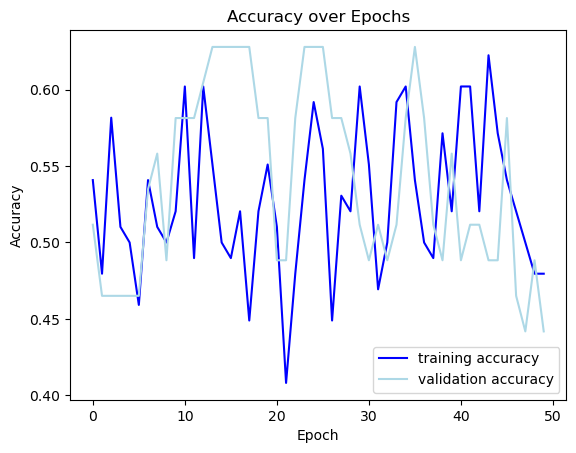

In [54]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

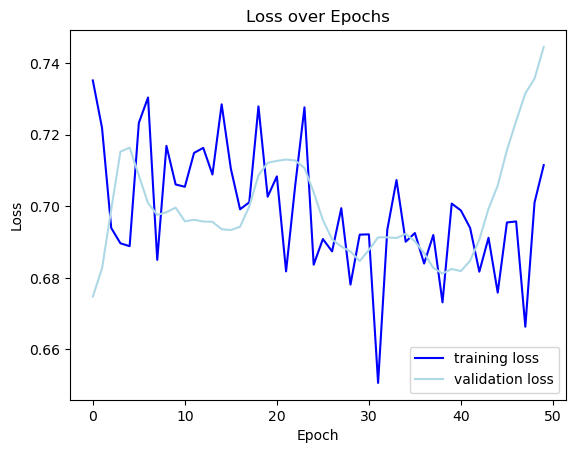

In [50]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

LSTM.evaluate() accuracy: 0.4419 LSTM.evaluate() loss:0.7012
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


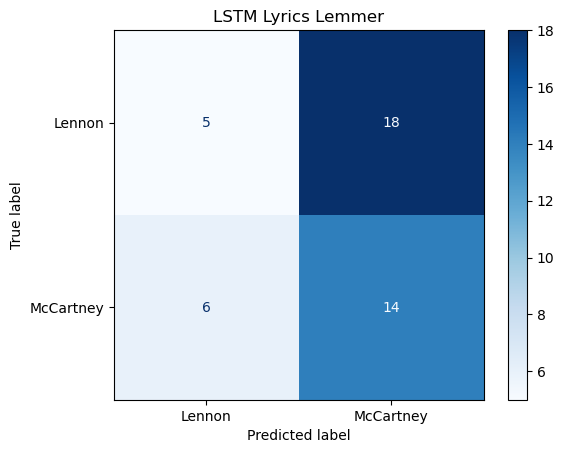

In [55]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test, verbose = 0)
print(f"LSTM.evaluate() accuracy: {Test_Accuracy:.4f} LSTM.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics Lemmer")
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.0000    0.0000    0.0000        23
   McCartney     0.4651    1.0000    0.6349        20

    accuracy                         0.4651        43
   macro avg     0.2326    0.5000    0.3175        43
weighted avg     0.2163    0.4651    0.2953        43



C:\Users\maede\New folder\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maede\New folder\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maede\New folder\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Lyrics cleaned using stemmer

In [57]:
########## ANN LYRICS STEMMER ##########
# Import data and split into training and testing
lyrics3 = pd.read_csv("paul_john_lyrics_corpus_stem_count100.csv") # (141, 101)

train_lyrics3, test_lyrics3 = train_test_split(lyrics3, test_size = 0.3, random_state = 42)

x_train_lyrics3 = train_lyrics3.loc[:, lyrics3.columns != "Label"].to_numpy() # (98, 100)
x_test_lyrics3 = test_lyrics3.loc[:, lyrics3.columns != "Label"].to_numpy() # (43, 300)
y_train_lyrics3 = train_lyrics3.loc[:, lyrics3.columns == "Label"].to_numpy() # (98, 1)
y_test_lyrics3 = test_lyrics3.loc[:, lyrics3.columns == "Label"].to_numpy() # (43, 1)

In [58]:
# What does the data look like?
print("The first value of x_train_lyrics3 is: \n", x_train_lyrics3[0])
print("The shape of x_train_lyrics3 is: ", x_train_lyrics3.shape, "\n")

print("The first value of y_train_lyrics3 is: ", y_train_lyrics3[0])
print("The shape of y_train_lyrics3 is: ", y_train_lyrics3.shape, "\n")

print("The first value of x_test_lyrics3 is: \n", x_test_lyrics3[0])
print("The shape of x_test_lyrics3 is: ", x_test_lyrics3.shape, "\n")

print("The first value of y_test_lyrics3 is: ", y_test_lyrics3[0])
print("The shape of y_test_lyrics3 is: ", y_test_lyrics3.shape, "\n")

# We need to one-hot-encode the labels
encoder = OneHotEncoder(sparse_output=False)
y_train_one_hot_lyrics3 = encoder.fit_transform(y_train_lyrics3)
y_test_one_hot_lyrics3 = encoder.transform(y_test_lyrics3)

# Need to change datatypes so they are compataible for keras later
x_train = np.array(x_train_lyrics3, dtype=np.float32) 
y_train = np.array(y_train_one_hot_lyrics3, dtype=np.float32) 
x_test = np.array(x_test_lyrics3, dtype=np.float32)
y_test = np.array(y_test_one_hot_lyrics3, dtype=np.float32)

# after one-hot-encode
print("The first value of x_train_lyrics1 is: \n", x_train[0])
print("The shape of x_train is: ", x_train.shape, "\n")

print("The first value of y_train_lyrics1 is: ", y_train[0])
print("The shape of y_train is: ", y_train.shape, "\n")

print("The first value of x_test_lyrics1 is: \n", x_test[0])
print("The shape of x_test is: ", x_test.shape, "\n")

print("The first value of y_test_lyrics1 is: ", y_test[0])
print("The shape of y_test is: ", y_test.shape, "\n")

The first value of x_train_lyrics3 is: 
 [5 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 9 0 1 2
 1 1 0 0 0 0 0 0 0 5 0 0 0 5 2 0 0 0 0 0 0 0 7 0 0 0 1 0 0 0 0 0 2 0 0 5 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0]
The shape of x_train_lyrics3 is:  (98, 100) 

The first value of y_train_lyrics3 is:  ['Lennon']
The shape of y_train_lyrics3 is:  (98, 1) 

The first value of x_test_lyrics3 is: 
 [ 0  0  3  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  2  0  0  0  1  0
  2  0  0  0  0  0  0  0  0  0  0  0  0  3  0 48  3  0  0  0  0 11  0  0
  0  0  1 33  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  7  0  0  0  0
  0  0  0  0  3  9  0  0  0  0  1 10  0  0  0  0  0  0  1  0  0  0  0  1
  0  1 53  0]
The shape of x_test_lyrics3 is:  (43, 100) 

The first value of y_test_lyrics3 is:  ['Lennon']
The shape of y_test_lyrics3 is:  (43, 1) 

The first value of x_train_lyrics1 is: 
 [5. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_13 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,062 (8.05 KB)

 Trainable params: 2,062 (8.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.4628 - loss: 2.9227 - val_accuracy: 0.5581 - val_loss: 1.4799
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4967 - loss: 2.7607 - val_accuracy: 0.5581 - val_loss: 1.2846
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5043 - loss: 2.2619 - val_accuracy: 0.4419 - val_loss: 1.1944
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4700 - loss: 1.5904 - val_accuracy: 0.4186 - val_loss: 1.2112
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5496 - loss: 1.5358 - val_accuracy: 0.4419 - val_loss: 1.2769
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4700 - loss: 1.5585 - val_accuracy: 0.4651 - val_loss: 1.3289
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5220 - loss: 1.2752 - val_accuracy: 0.4651 - val_loss: 1.3677
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5052 - loss: 1.2307 - val_accuracy: 0.4651 - val_loss: 1.3965

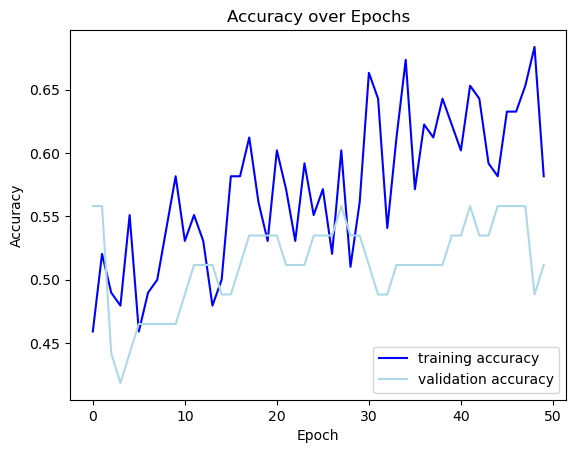

In [59]:
########## ANN LYRICS LEMMER ##########
##########################################################
# Create sequential ANN. 
# BUILD MODEL
ANN = keras.Sequential([tf.keras.layers.Input(shape=(100, )),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(20, activation='relu'),
                        tf.keras.layers.Dense(2, activation='softmax')])

# MODEL SUMMARY
ANN.summary()

# COMPILE MODEL
ANN.compile(loss="categorical_crossentropy",
            metrics=["accuracy"],
            optimizer='adam')

# FIT THE MODEL TO TRAINING DATA
Fit = ANN.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

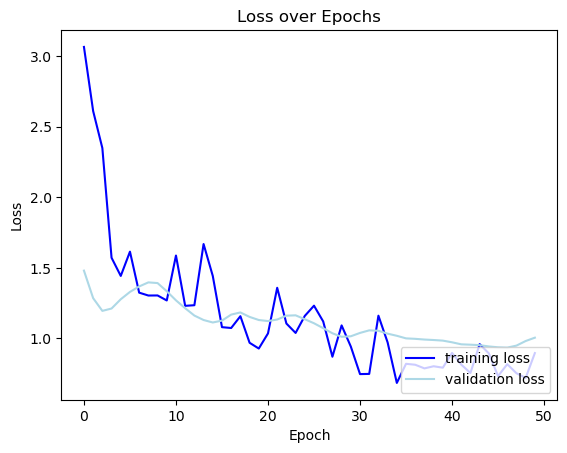

In [60]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

ANN.evaluate() accuracy: 0.5116 ANN.evaluate() loss:1.0044
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


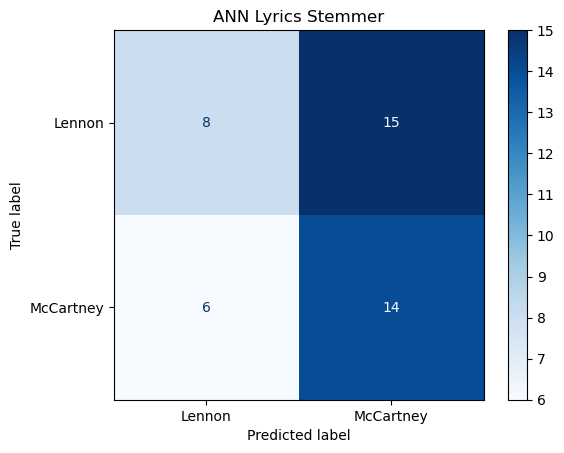

In [63]:
# TEST
Test_Loss, Test_Accuracy = ANN.evaluate(x_test, y_test, verbose = 0)
print(f"ANN.evaluate() accuracy: {Test_Accuracy:.4f} ANN.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = ANN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("ANN Lyrics Stemmer")
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.5714    0.3478    0.4324        23
   McCartney     0.4828    0.7000    0.5714        20

    accuracy                         0.5116        43
   macro avg     0.5271    0.5239    0.5019        43
weighted avg     0.5302    0.5116    0.4971        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,927 (15.34 KB)

 Trainable params: 3,927 (15.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.4215 - loss: 0.9618 - val_accuracy: 0.5116 - val_loss: 0.7403
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4563 - loss: 0.8828 - val_accuracy: 0.4651 - val_loss: 0.7092
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5042 - loss: 0.7995 - val_accuracy: 0.4419 - val_loss: 0.7388
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5673 - loss: 0.7886 - val_accuracy: 0.4651 - val_loss: 0.7606
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5879 - loss: 0.7990 - val_accuracy: 0.4651 - val_loss: 0.7412
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5341 - loss: 0.9005 - val_accuracy: 0.5349 - val_loss: 0.7223
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5124 - loss: 0.7906 - val_accuracy: 0.4651 - val_loss: 0.6928
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5413 - loss: 0.8422 - val_accuracy: 0.6047 - val_loss: 0.673

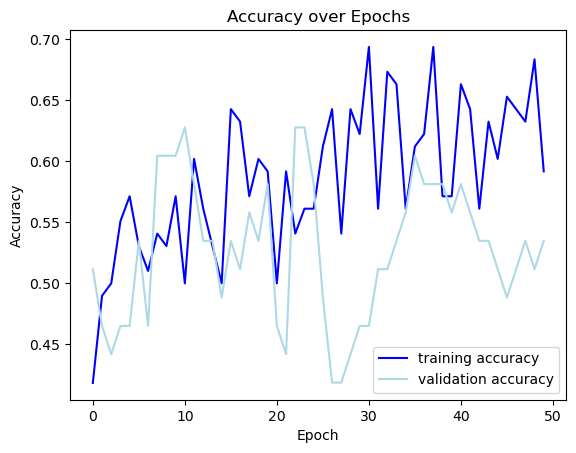

In [66]:
########## RNN LYRICS LEMMER ##########
##########################################################
# Create sequential RNN
# BUILD MODEL
RNN = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

RNN.summary()

RNN.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = RNN.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

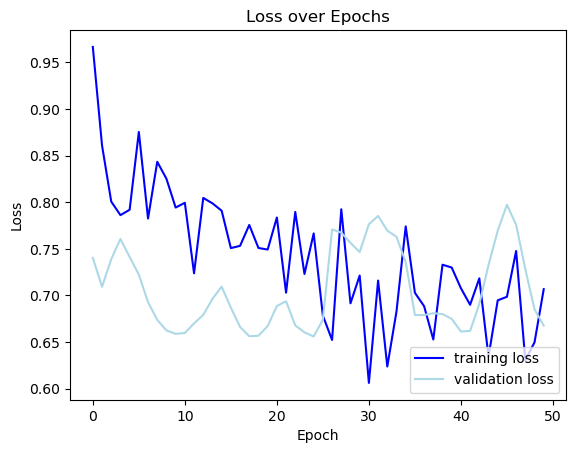

In [67]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

RNN.evaluate() accuracy: 0.5349 RNN.evaluate() loss:0.6677
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step


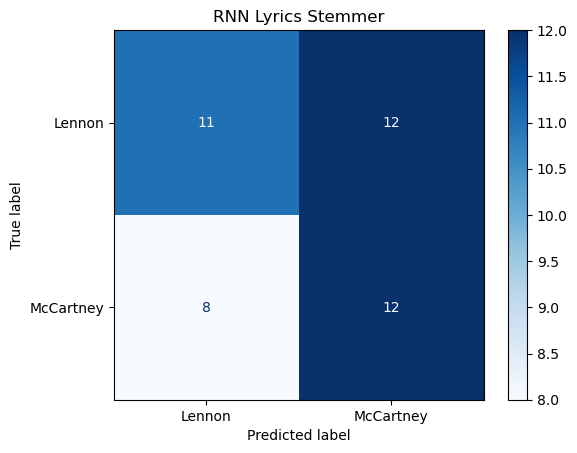

In [69]:
# TEST
Test_Loss, Test_Accuracy = RNN.evaluate(x_test, y_test, verbose = 0)
print(f"RNN.evaluate() accuracy: {Test_Accuracy:.4f} RNN.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = RNN.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("RNN Lyrics Stemmer")
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     0.5789    0.4783    0.5238        23
   McCartney     0.5000    0.6000    0.5455        20

    accuracy                         0.5349        43
   macro avg     0.5395    0.5391    0.5346        43
weighted avg     0.5422    0.5349    0.5339        43



C:\Users\maede\New folder\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 364ms/step - accuracy: 0.4957 - loss: 0.6986 - val_accuracy: 0.6512 - val_loss: 0.6724
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.5526 - loss: 0.7036 - val_accuracy: 0.6279 - val_loss: 0.6793
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.4938 - loss: 0.6864 - val_accuracy: 0.5581 - val_loss: 0.6844
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.5383 - loss: 0.7069 - val_accuracy: 0.5349 - val_loss: 0.6848
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.4960 - loss: 0.7203 - val_accuracy: 0.5349 - val_loss: 0.6843
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5308 - loss: 0.6904 - val_accuracy: 0.5349 - val_loss: 0.6891
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5094 - loss: 0.6983 - val_accuracy: 0.5116 - val_loss: 0.6916
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.6055 - loss: 0.6977 - val_accuracy: 0.5349 - val_loss:

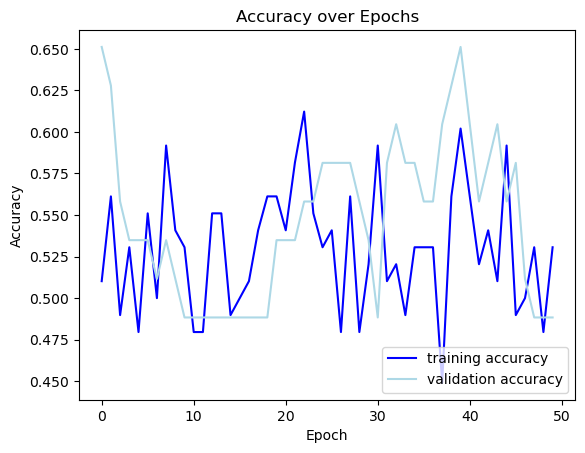

In [71]:
########## LSTM LYRICS ENGLISH STOP WORDS ##########
##########################################################
# Create sequential LSTM
# BUILD MODEL
LSTM = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 50, input_shape = (100, 1)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation = 'softmax')])

LSTM.summary()

LSTM.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = False), metrics = ["accuracy"], optimizer = "adam")

Fit = LSTM.fit(x_train, y_train, epochs = 50, validation_data =(x_test, y_test))

# PLOT RESULTS
# Accuracy
plt.plot(Fit.history['accuracy'], label = 'training accuracy', color = 'blue')
plt.plot(Fit.history['val_accuracy'], label = 'validation accuracy', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over Epochs")
plt.legend(loc='lower right')
plt.show()

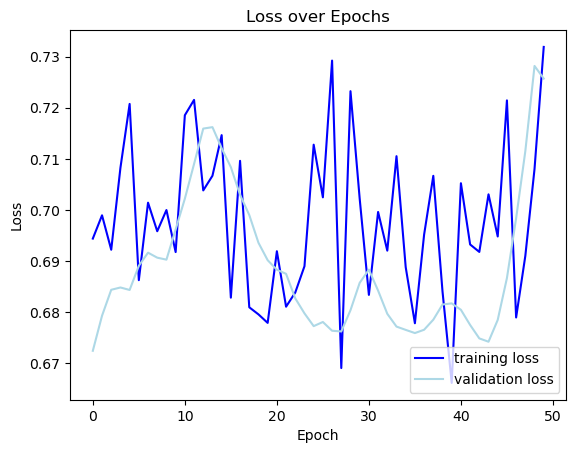

In [73]:
# Loss
plt.plot(Fit.history['loss'], label = 'training loss', color = 'blue')
plt.plot(Fit.history['val_loss'], label = 'validation loss', color = 'lightblue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over Epochs")
plt.legend(loc='lower right')
plt.show()

LSTM.evaluate() accuracy: 0.4884 LSTM.evaluate() loss:0.7257
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step


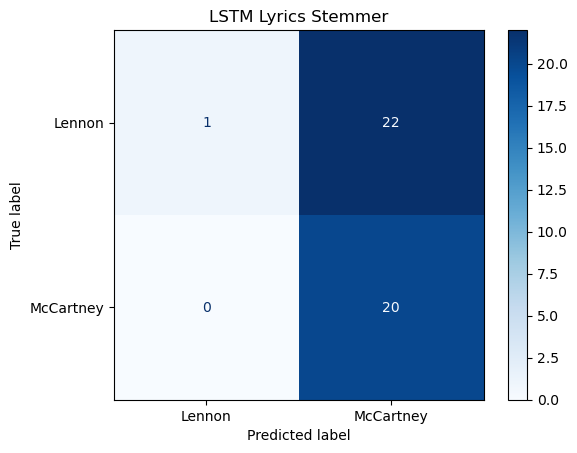

In [74]:
# TEST
Test_Loss, Test_Accuracy = LSTM.evaluate(x_test, y_test, verbose = 0)
print(f"LSTM.evaluate() accuracy: {Test_Accuracy:.4f} LSTM.evaluate() loss:{Test_Loss:.4f}")


# PREDICT & CONFUSION MATRIX
predictions = LSTM.predict(x_test)
Max_Values = np.squeeze(np.array(predictions.argmax(axis=1))) # all our label predictions

y_numeric = np.argmax(y_test, axis = 1)     
y_hat_numeric = Max_Values
labels = ['Lennon', 'McCartney']
cm = confusion_matrix(y_numeric, y_hat_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = 'Blues')
plt.title("LSTM Lyrics Stemmer")
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_numeric, y_hat_numeric, target_names=labels, digits=4))

              precision    recall  f1-score   support

      Lennon     1.0000    0.0435    0.0833        23
   McCartney     0.4762    1.0000    0.6452        20

    accuracy                         0.4884        43
   macro avg     0.7381    0.5217    0.3642        43
weighted avg     0.7564    0.4884    0.3446        43

